# Data exploration

* [Missing Values](#chapter1)
* [Cell_Type Analysis](#chapter2)
* [Geographic_cluster](#chapter3)
* [Correlation Analysis](#chapter4)
    * [Weather Correlation](#section_4_1)
    * [Alarms correlation](#section_4_2)
* [Seasonal pattern of faults](#chapter5)
* [Features trends](#chapter6)
    * [Comparison between weather prediction and real weather](#section_6_1)
    * [Showing that the difference is 0](#section_6_2)
    * [Comparing 3days vs 7 days weather features](#section_6_3)
    * [Plot alarm features trend](#section_6_4)
    * [Skewness and kurtosis](#section_6_5)

In [7]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
sys.path.append('..')

from helper import data_container


In [3]:
dataset_path = '../dataset/train.csv'
testset_path = '../dataset/test.csv'
#dataset_path = '/content/drive/MyDrive/Project/dataset/train.csv'
#testset_path = '/content/drive/MyDrive/Project/dataset/test.csv'
dataset = pd.read_csv(dataset_path)
test = pd.read_csv(testset_path)

In [3]:
dataset.head()

SITE_ID        DATE  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
0      146  2019-04-10                1                0              0   
1      146  2019-04-11                1                0              0   
2      146  2019-04-12                1                0              0   
3      146  2019-04-13                1                0              0   
4      146  2019-04-14                1                0              0   

   CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
0                  0                0                  3.0   
1                  0                0                  3.0   
2                  0                0                  3.0   
3                  0                0                  3.0   
4                  0                0                  3.0   

   GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  ...  \
0                       0                       0  ...   
1                       0                       0  ...   
2                       0                       0  ...   
3                       0                       0  ...   
4                       0                       0  ...   

   skew_equipment_alarms_prev14d  skew_fire/smoke_alarms_prev14d  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   skew_ge_alarms_prev14d  skew_power_alarms_prev14d  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   skew_temperature_alarms_prev14d  kurt_equipment_alarms_prev14d  \
0                              0.0                      -1.212308   
1                              0.0                      -1.212308   
2                              0.0                      -1.212308   
3                              0.0                      -1.212308   
4                              0.0                      -1.212308   

   kurt_fire/smoke_alarms_prev14d  kurt_ge_alarms_prev14d  \
0                       -1.212308               -1.212308   
1                       -1.212308               -1.212308   
2                       -1.212308               -1.212308   
3                       -1.212308               -1.212308   
4                       -1.212308               -1.212308   

   kurt_power_alarms_prev14d  kurt_temperature_alarms_prev14d  
0                  -1.212308                        -1.212308  
1                  -1.212308                        -1.212308  
2                  -1.212308                        -1.212308  
3                  -1.212308                        -1.212308  
4                  -1.212308                        -1.212308  

[5 rows x 136 columns]

## Missing Values <a class="anchor" id="chapter2"></a>
Looking for missing values

In [4]:
print(dataset.isnull().sum(axis=1).sort_values(ascending=False).head(1))
print(test.isnull().sum(axis=1).sort_values(ascending=False).head(1))

621299    0
dtype: int64
160199    0
dtype: int64


There are **no missing values** in our training set and test set. 

In [5]:
dataset['sum_cell']= dataset[['CELL_TYPE_Macro','CELL_TYPE_Mobil',    'CELL_TYPE_Tx site',    'CELL_TYPE_micro', 'CELL_TYPE_TRP']].sum(axis = 1)
dataset[dataset['sum_cell']==0][['SITE_ID','sum_cell']]

SITE_ID  sum_cell
82200      2399         0
82201      2399         0
82202      2399         0
82203      2399         0
82204      2399         0
...         ...       ...
617095     2377         0
617096     2377         0
617097     2377         0
617098     2377         0
617099     2377         0

[4500 rows x 2 columns]

There are 4500 entries with no associated **CELL_TYPE**, that corresponds to **15 SITES** with no **CELL_TYPE**

In [6]:
dataset['sum_cell_gc']= dataset[['GEOGRAPHIC_CLUSTER_K_0','GEOGRAPHIC_CLUSTER_K_1','GEOGRAPHIC_CLUSTER_K_2','GEOGRAPHIC_CLUSTER_K_3','GEOGRAPHIC_CLUSTER_K_4',
                       'GEOGRAPHIC_CLUSTER_K_5','GEOGRAPHIC_CLUSTER_K_6','GEOGRAPHIC_CLUSTER_K_7','GEOGRAPHIC_CLUSTER_K_8','GEOGRAPHIC_CLUSTER_K_9']].sum(axis = 1)
dataset[dataset['sum_cell_gc']==0][['SITE_ID','sum_cell_gc']]

Empty DataFrame
Columns: [SITE_ID, sum_cell_gc]
Index: []

It returns an empty dataset, so every single SITE is associated to a **geographical cluster**

In [7]:
#checking if all sites have 300 entries
for site in dataset['SITE_ID'].unique():
    mis = len(dataset[dataset['SITE_ID']==site]['DATE'].unique())
    if mis != 300:
        print(site)

All sites have the correct amount of data

## Cell_type analysis <a class="anchor" id="chapter2"></a>
Checking the distribution of the cell types.

In [8]:
dataset = pd.read_csv(dataset_path)

In [9]:
# plot cell categories.
temp = dataset[['SITE_ID','CELL_TYPE_Macro', 'CELL_TYPE_Mobil', 'CELL_TYPE_TRP', 'CELL_TYPE_Tx site', 'CELL_TYPE_micro']]
IDs = (temp.groupby('SITE_ID').sum())/300
IDs = IDs.astype(int)

In [10]:
#number of elements per class
values = IDs.sum()
values

CELL_TYPE_Macro      1909
CELL_TYPE_Mobil         2
CELL_TYPE_TRP           0
CELL_TYPE_Tx site      69
CELL_TYPE_micro        76
dtype: int64

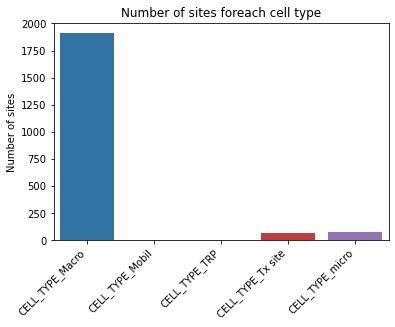

In [11]:
ax = sns.barplot(x = values.index, y = values);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_title("Number of sites foreach cell type");
ax.set_ylabel("Number of sites");

***CEL_TYPE_TRP*** has no instances in our dataset, while ***CELL_TYPE_MOBIL*** has only 2 instances. Overall our dataset has a really unbalanced number of ***CELL_TYPES***, with ***CELL_TYPE_MACRO*** being the most common type by far.

##Geographic_cluster analysis <a class="anchor" id="chapter3"></a>
Checking the distribution of the geographic cluster.

In [12]:
# plot cell categories.
temp = dataset[np.concatenate((['SITE_ID'],[col for col in dataset.columns if 'GEOGRAPHIC_CLUSTER_K_' in col]))]
IDs_geo = (temp.groupby('SITE_ID').sum())/300
IDs_geo = IDs_geo.astype(int)

In [13]:
#number of elements per class
values_geo = IDs_geo.sum()
values_geo

GEOGRAPHIC_CLUSTER_K_0    232
GEOGRAPHIC_CLUSTER_K_1    212
GEOGRAPHIC_CLUSTER_K_2    212
GEOGRAPHIC_CLUSTER_K_3    144
GEOGRAPHIC_CLUSTER_K_4    222
GEOGRAPHIC_CLUSTER_K_5    170
GEOGRAPHIC_CLUSTER_K_6    161
GEOGRAPHIC_CLUSTER_K_7    433
GEOGRAPHIC_CLUSTER_K_8    158
GEOGRAPHIC_CLUSTER_K_9    127
dtype: int64

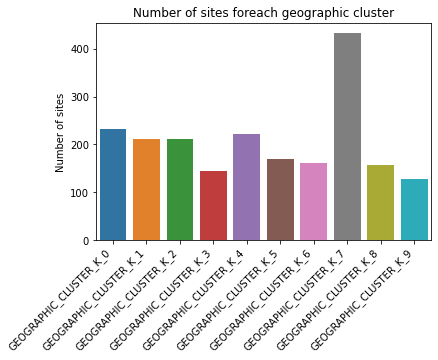

In [14]:
ax = sns.barplot(x = values_geo.index, y = values_geo);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_title("Number of sites foreach geographic cluster");
ax.set_ylabel("Number of sites");

The sites are well distributed within the clusters

## Correlation Analysis <a class="anchor" id="chapter4"></a>

We plot the correlation between groups of features (temperature, rain, humidity ecc...). We expect to get a high correlation between the same category of feature computed on a different time frame. For example ***mean_temperature_prev7d*** and ***mean_temperature_prev3d***

### Weather Correlation <a class="anchor" id="section_4_1"></a>


In [15]:
temp_cols = [col for col in dataset.columns if ('temperature_prev' in col or 'temperature_f' in col)]
rain_cols = [col for col in dataset.columns if ('rain_mm_prev' in col or 'rain_mm_f' in col)]
hum_cols = [col for col in dataset.columns if ('humidity_prev' in col or 'humidity_f' in col)]
wind_cols = [col for col in dataset.columns if ('wind_speed_prev' in col or 'wind_speed_f' in col)]
press_cols = [col for col in dataset.columns if ('pressure_prev' in col or 'pressure_f' in col)]

df_temp=dataset[temp_cols];
df_rain=dataset[rain_cols];
df_hum=dataset[hum_cols];
df_wind=dataset[wind_cols];
df_press=dataset[press_cols]

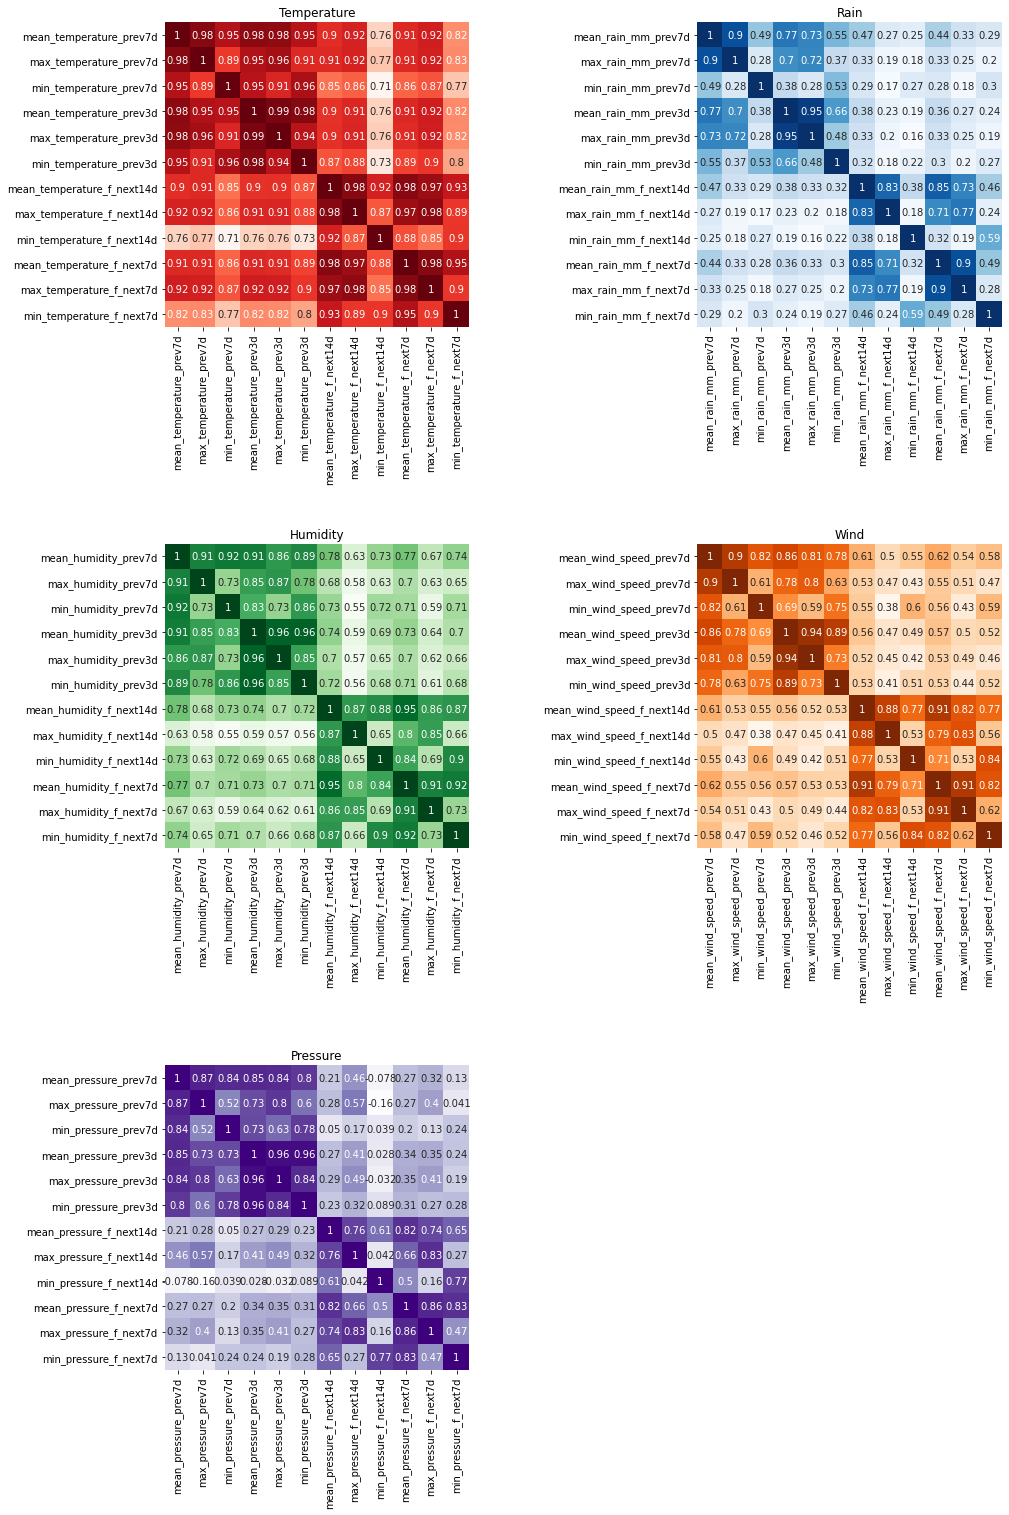

In [16]:
f, axs = plt.subplots(figsize= (15,25), ncols=2, nrows=3)

f.subplots_adjust(wspace=0.75)
f.subplots_adjust(hspace=0.65)

sns.heatmap(df_temp.corr(), square=True, annot=True, ax=axs[0, 0], cmap="Reds", cbar=False).set(title = 'Temperature');
sns.heatmap(df_rain.corr(), square=True, annot=True, ax=axs[0, 1], cmap='Blues', cbar=False).set(title= 'Rain');
sns.heatmap(df_hum.corr(), square=True, annot=True, ax=axs[1, 0], cmap='Greens', cbar=False).set(title= 'Humidity');
sns.heatmap(df_wind.corr(), square=True, annot=True, ax=axs[1, 1], cmap='Oranges', cbar=False).set(title= 'Wind');
sns.heatmap(df_press.corr(), square=True, annot=True, ax=axs[2, 0], cmap='Purples', cbar=False).set(title= 'Pressure');
axs[2, 1].axis('off');

Temperature is the one with the highest amount of correlation. (spiegazione...). Rain has the lowest amount of correlation timewise, this is due to the "impulsive" nature of raining (spiegare meglio)

### Alarms correlation <a class="anchor" id="section_4_2"></a>

In [17]:
df_alarms = dataset[[col for col in dataset.columns if '_persistance_' in col or '_alarms_' in col]]

equipment_cols = [col for col in df_alarms.columns if ('equipment_' in col and 'skew' not in col and 'kurt' not in col)]
firesmoke_cols = [col for col in df_alarms.columns if ('fire/smoke_' in col and 'skew' not in col and 'kurt' not in col)]
ge_cols = [col for col in df_alarms.columns if ('ge_' in col and 'skew' not in col and 'kurt' not in col)]
power_cols = [col for col in df_alarms.columns if ('power_' in col and 'skew' not in col and 'kurt' not in col)]
temperature_cols = [col for col in df_alarms.columns if ('temperature_' in col and 'skew' not in col and 'kurt' not in col)]

df_equipment=dataset[equipment_cols];
df_firesmoke=dataset[firesmoke_cols];
df_ge=dataset[ge_cols];
df_power=dataset[power_cols];
df_temperature=dataset[temperature_cols];

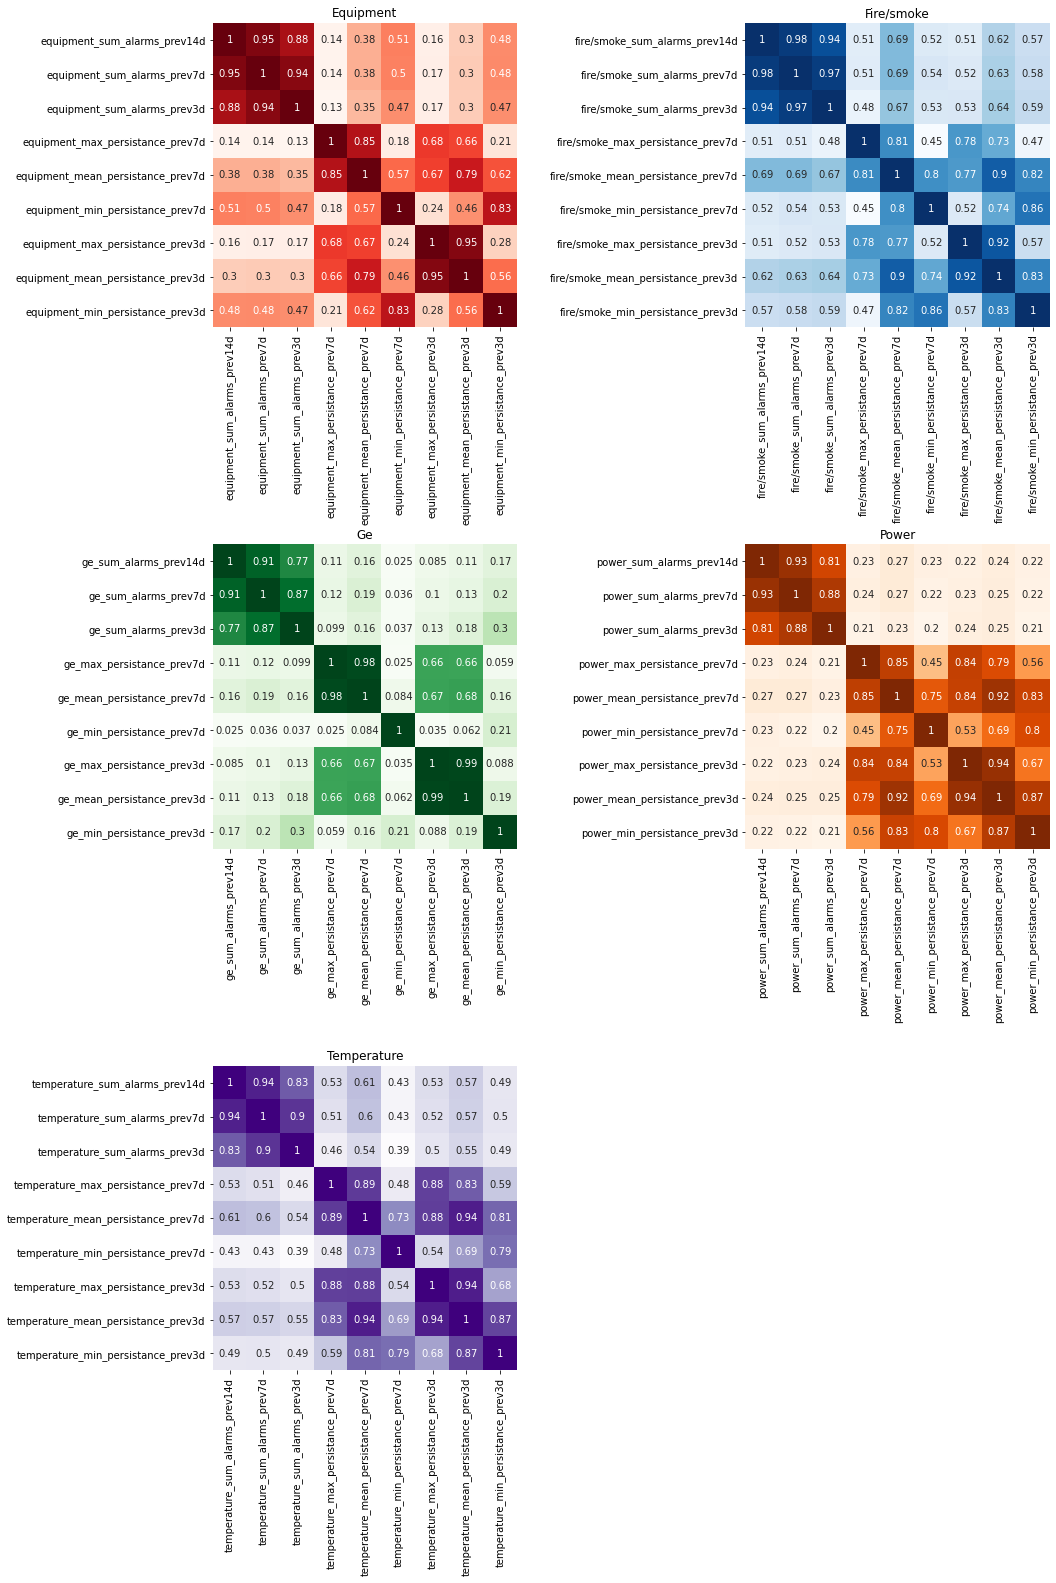

In [18]:
f, axs = plt.subplots(figsize= (15,25), ncols=2, nrows=3)

f.subplots_adjust(wspace=0.75)
f.subplots_adjust(hspace=0.65)

sns.heatmap(df_equipment.corr(), square=True, annot=True, ax=axs[0, 0], cmap="Reds", cbar=False).set(title = 'Equipment');
sns.heatmap(df_firesmoke.corr(), square=True, annot=True, ax=axs[0, 1], cmap='Blues', cbar=False).set(title= 'Fire/smoke');
sns.heatmap(df_ge.corr(), square=True, annot=True, ax=axs[1, 0], cmap='Greens', cbar=False).set(title= 'Ge');
sns.heatmap(df_power.corr(), square=True, annot=True, ax=axs[1, 1], cmap='Oranges', cbar=False).set(title= 'Power');
sns.heatmap(df_temperature.corr(), square=True, annot=True, ax=axs[2, 0], cmap='Purples', cbar=False).set(title= 'Temperature');
axs[2, 1].axis('off');

## Seasonal pattern of faults <a class="anchor" id="chapter5"></a>
The idea here is that AC systems failures have some kind of seasonal pattern that we can exploit, to verify it we plot the number of sites with 'aircon_sum_target_next14d' = 1 for every day.
As we expected, we have the highest number of failures during summer. We have a peak in June and another one at the ending of July. (scrivere ipotesi)

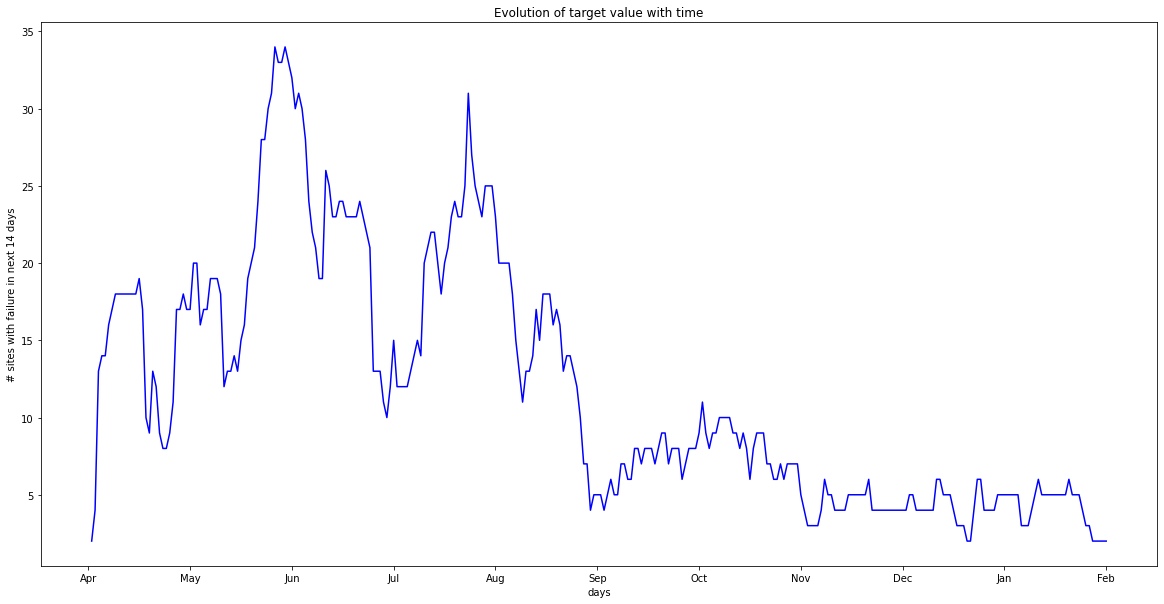

In [19]:
fault_in_time = dataset[['DATE', 'aircon_sum_target_next14d']].groupby('DATE').sum()
fault_in_time
X = np.arange(1, fault_in_time.shape[0] + 1)
Y = fault_in_time['aircon_sum_target_next14d']

f, ax1 = plt.subplots(figsize= (20,10), nrows=1)
ax1.set_title('Evolution of target value with time')
ax1.set_xlabel('days')
ax1.set_ylabel('# sites with failure in next 14 days')
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
plt.plot(X, Y, color='Blue');

In [25]:
container = data_container(dataset, drop=False)
numerical_feature = container.numerical_features

In [26]:
numerical_feature

remove = ['temperature_max_persistance_prev14d', 'temperature_min_persistance_prev14d', 'temperature_mean_persistance_prev14d','mean_temperature_prev14d', 'min_pressure_prev14d', 'power_mean_persistance_prev14d', 'max_humidity_prev14d', 'min_temperature_prev14d', 'max_wind_speed_prev14d', 'equipment_max_persistance_prev14d', 'max_temperature_prev14d', 'min_rain_mm_prev14d', 'ge_max_persistance_prev14d', 'min_humidity_prev14d', 'equipment_mean_persistance_prev14d', 'fire/smoke_min_persistance_prev14d', 'min_wind_speed_prev14d', 'mean_pressure_prev14d', 'max_rain_mm_prev14d', 'temperature_max_persistance_prev14d', 'temperature_mean_persistance_prev14d', 'equipment_min_persistance_prev14d', 'power_min_persistance_prev14d', 'fire/smoke_mean_persistance_prev14d', 'power_max_persistance_prev14d', 'max_pressure_prev14d', 'mean_wind_speed_prev14d', 'mean_rain_mm_prev14d', 'mean_humidity_prev14d', 'ge_mean_persistance_prev14d', 'temperature_min_persistance_prev14d', 'ge_min_persistance_prev14d', 'fire/smoke_max_persistance_prev14d']
for string in remove:
    if string in numerical_feature: numerical_feature.remove(string)


In [27]:
df_numerical = dataset[numerical_feature]
df_numerical

scaler = StandardScaler()
scaler.fit(df_numerical)
norm_data = scaler.transform(df_numerical)

dataset[numerical_feature] = norm_data

## Features trends  <a class="anchor" id="chapter6"></a>

### Comparison between weather prediction and real weather <a class="anchor" id="section_6_1"></a>

We checked the difference between the previous weather condition and the forecasted ones. We noticed that the plots are actually same, just shifted of a week. We further tested this doing a difference between the previous data and the forecasted one, getting 0 as result. The data is the same. This is going to be useful in the future selection process.

These considerations hold also for the min and max variables, not only the mean.

In [16]:
#adding cluster string label
geo_cols = [col for col in dataset.columns if 'GEOGRAPHIC_CLUSTER_K_' in col]
df_geo=dataset[geo_cols];

dataset['cluster_class']=df_geo.idxmax(1)

In [17]:
df_cluster_date_group = dataset.groupby(['cluster_class', 'DATE']).mean().reset_index()

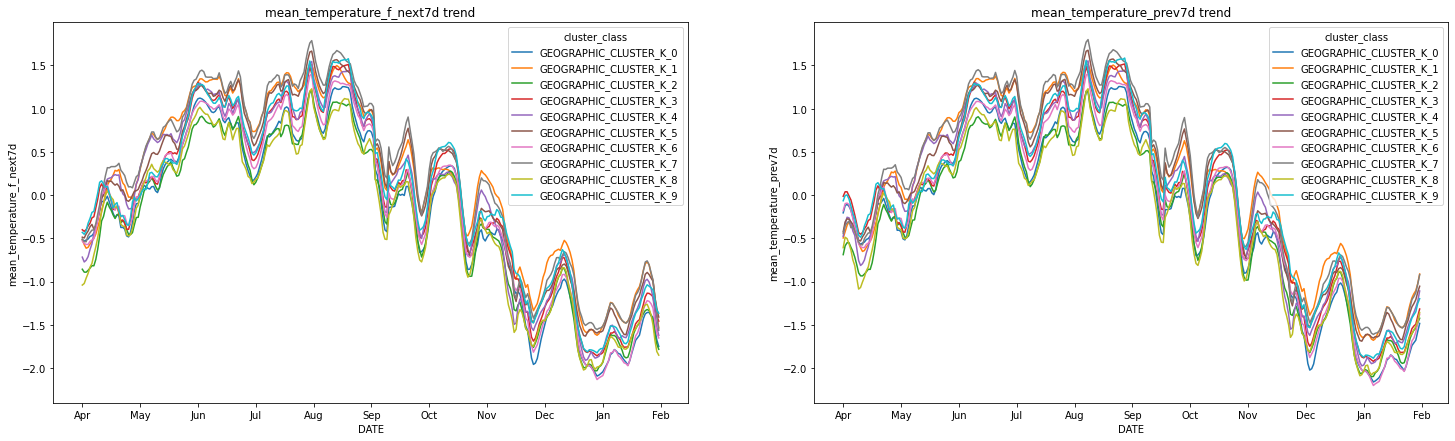

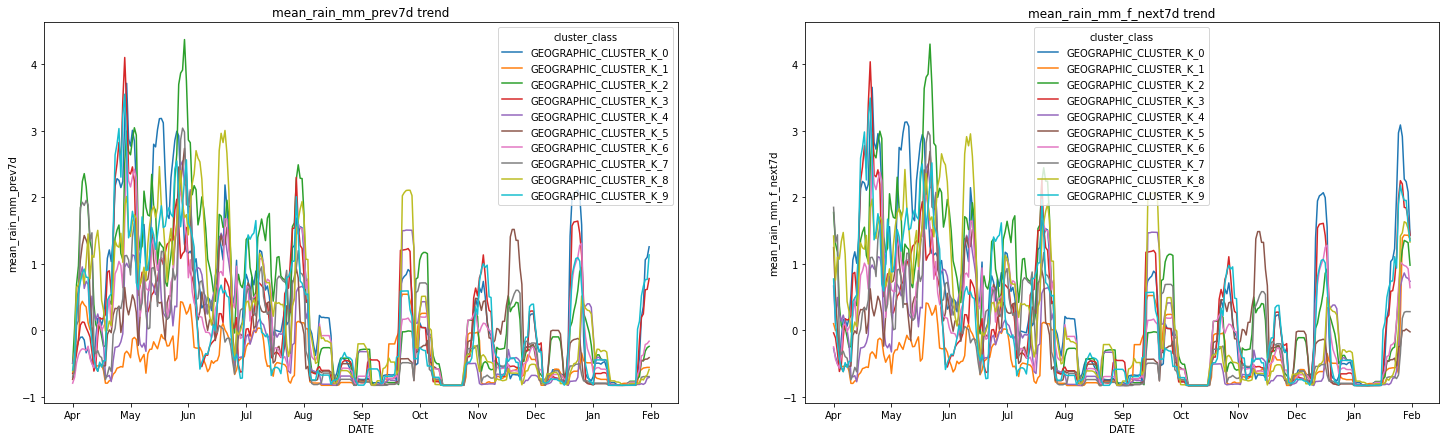

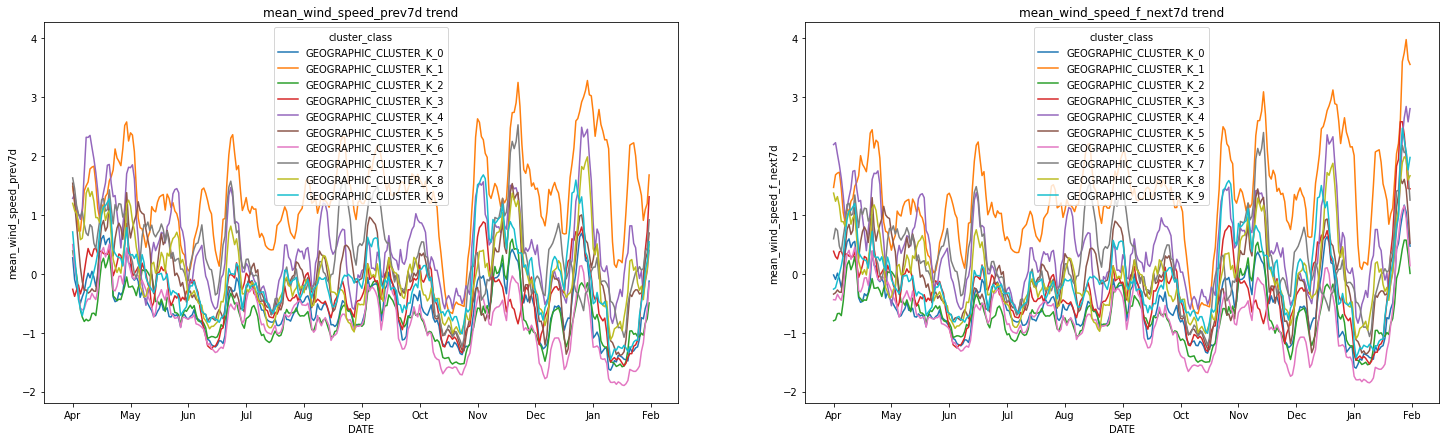

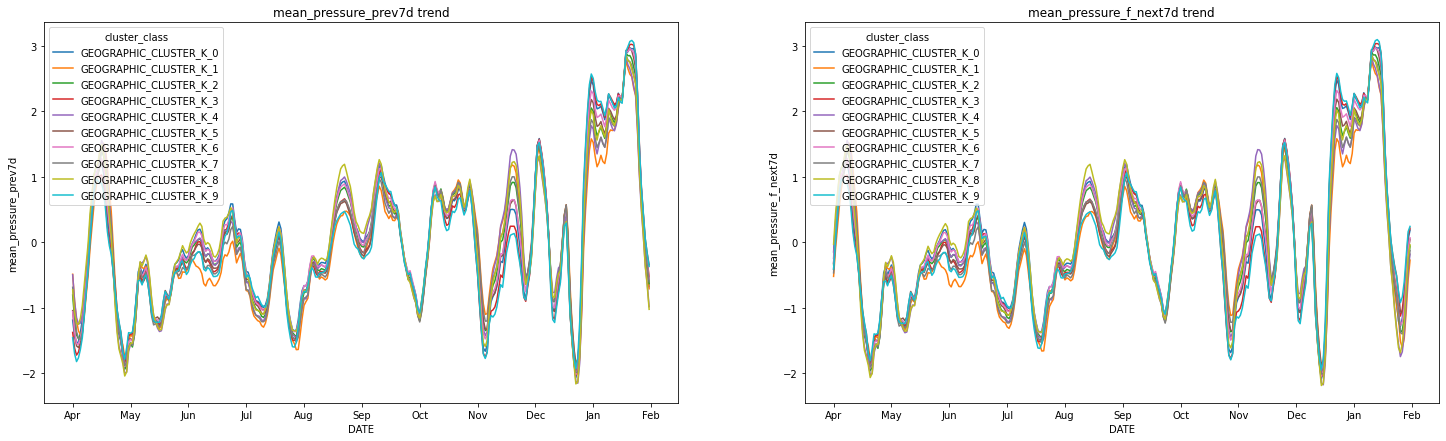

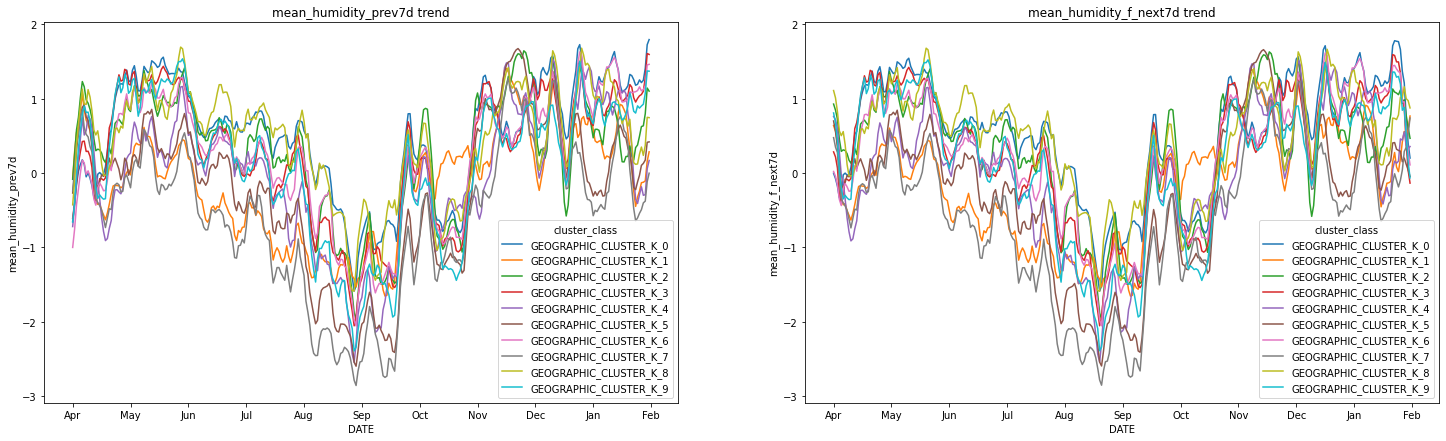

In [18]:
vars = ['mean_temperature_f_next7d','mean_temperature_prev7d','mean_rain_mm_prev7d', 'mean_rain_mm_f_next7d', 
        'mean_wind_speed_prev7d', 'mean_wind_speed_f_next7d', 'mean_pressure_prev7d', 'mean_pressure_f_next7d', 'mean_humidity_prev7d', 'mean_humidity_f_next7d']

for i in range(0,len(vars),2):
    f, axs = plt.subplots(figsize= (25,7), ncols=2,  sharey='row')
    
    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i], ax=axs[0], hue='cluster_class').set(title=vars[i]+' trend') 
    
    axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[1].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+1],ax=axs[1], hue='cluster_class').set(title=vars[i+1]+' trend') 

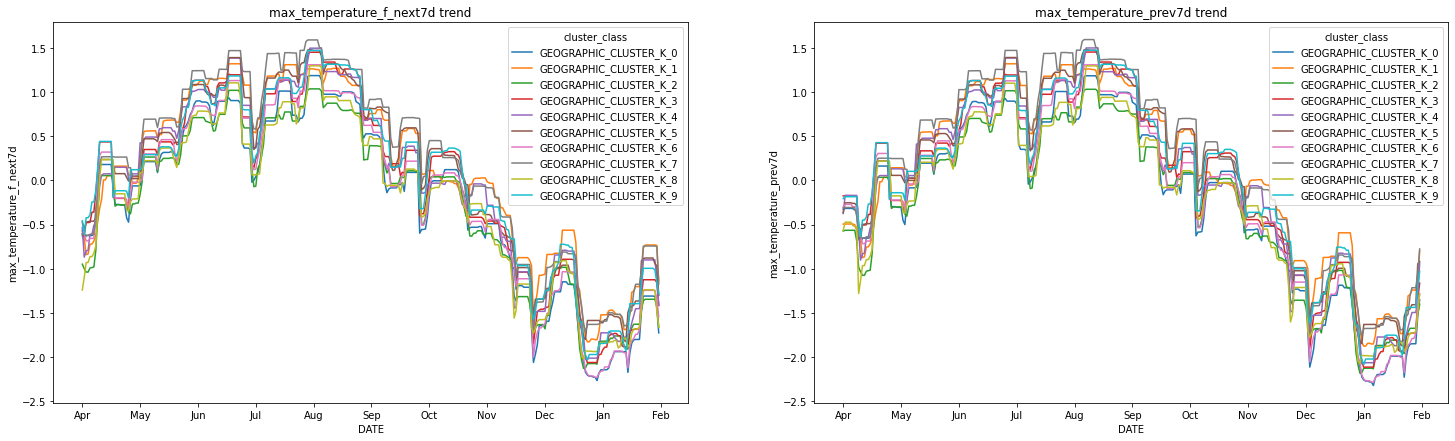

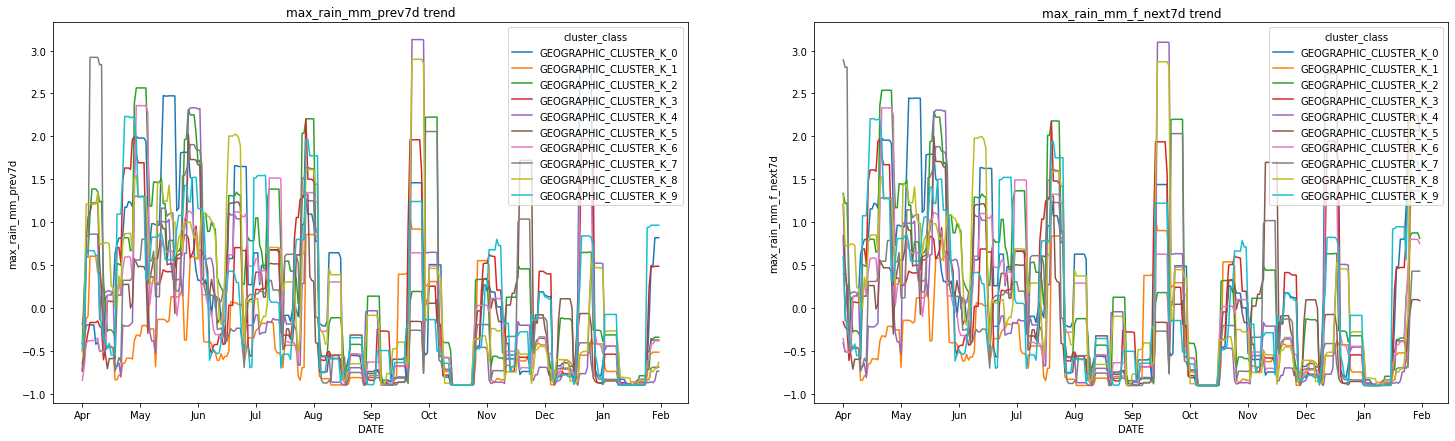

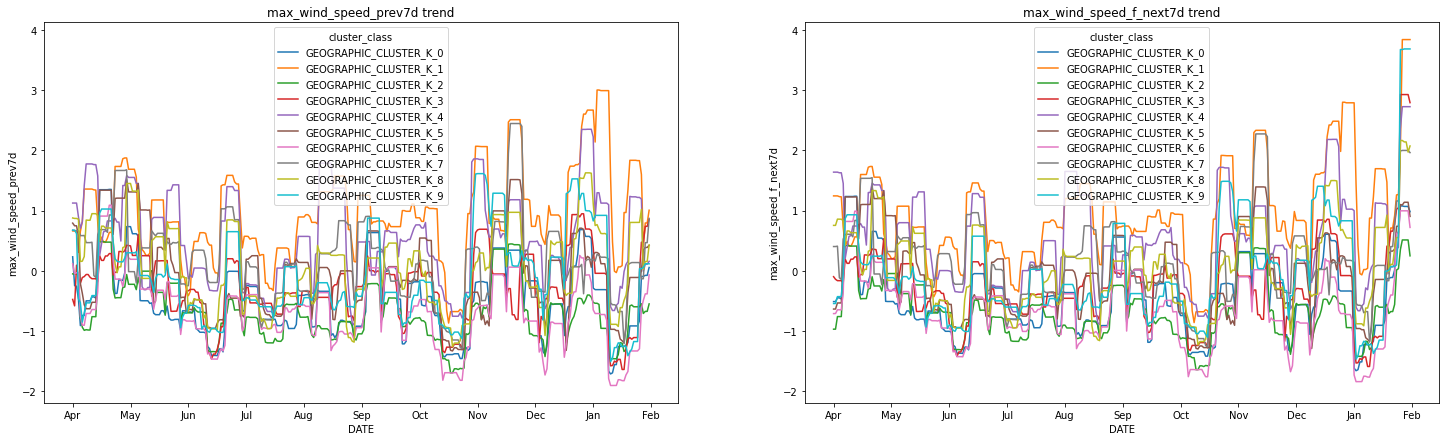

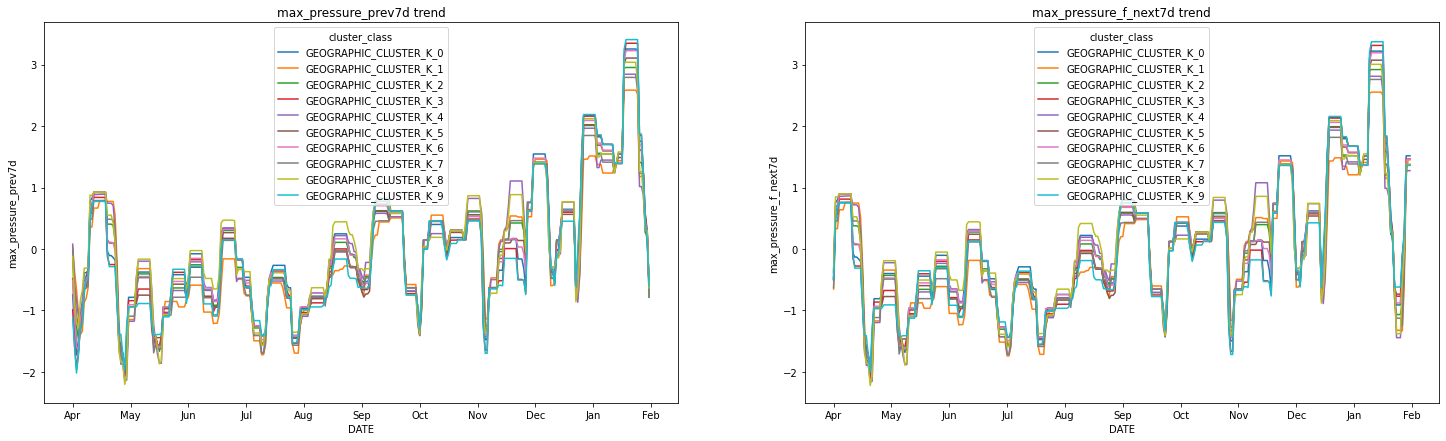

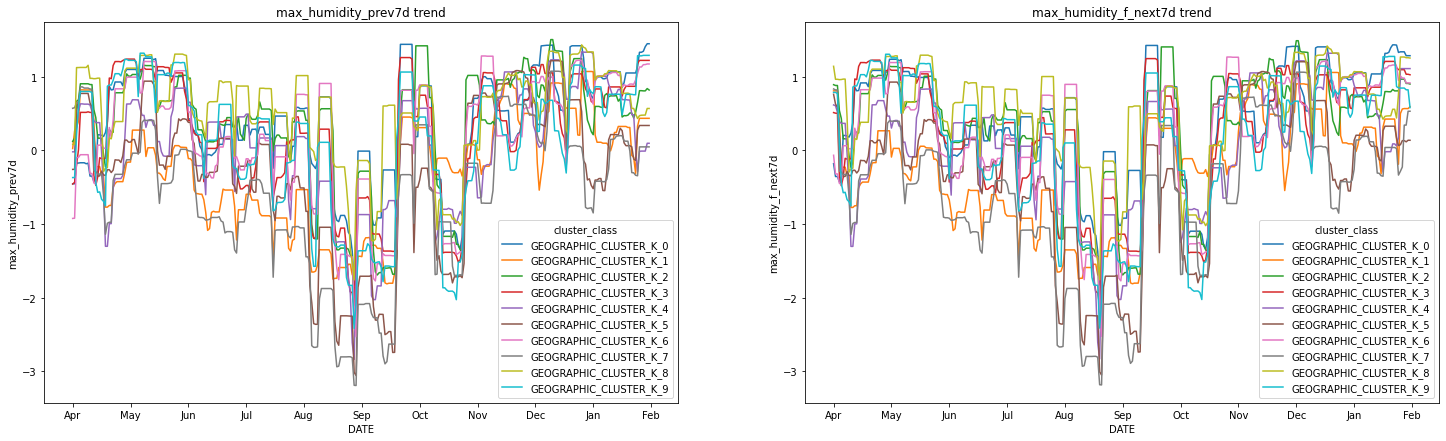

In [19]:
# checking also for min and max features

vars = ['max_temperature_f_next7d','max_temperature_prev7d','max_rain_mm_prev7d', 'max_rain_mm_f_next7d', 
        'max_wind_speed_prev7d', 'max_wind_speed_f_next7d', 'max_pressure_prev7d', 'max_pressure_f_next7d', 'max_humidity_prev7d', 'max_humidity_f_next7d']

for i in range(0,len(vars),2):
    f, axs = plt.subplots(figsize= (25,7), ncols=2,  sharey='row')

    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i], ax=axs[0], hue='cluster_class').set(title=vars[i]+' trend')
    
    axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[1].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+1],ax=axs[1], hue='cluster_class').set(title=vars[i+1]+' trend')

### Showing that the difference is 0 <a class="anchor" id="section_6_2"></a>

We shifted the values of prev7d and compared with the forecasted ones. They're the same identical data as shown in the plot, except for the tail, where the forecast and prev7d are different because of the time frame: forecast data has an "extra" week at the end of the dataset, while prev7d has an extra week at the beginning of the dataset due to the forward/backward data. 


In [20]:
df=dataset

df['mean_temperature_prev7d_shift']=df['mean_temperature_prev7d'].shift(-8, axis = 0)
df['mean_temperature_prev7d_diff']=df['mean_temperature_prev7d_shift']-df['mean_temperature_f_next7d']

df['mean_rain_mm_prev7d_shift']=df['mean_rain_mm_prev7d'].shift(-8, axis = 0)
df['mean_rain_mm_prev7d_diff']=df['mean_rain_mm_prev7d_shift']-df['mean_rain_mm_f_next7d']

df['mean_humidity_prev7d_shift']=df['mean_humidity_prev7d'].shift(-8, axis = 0)
df['mean_humidity_prev7d_diff']=df['mean_humidity_prev7d_shift']-df['mean_humidity_f_next7d']

df['mean_wind_speed_prev7d_shift']=df['mean_wind_speed_prev7d'].shift(-8, axis = 0)
df['mean_wind_speed_prev7d_diff']=df['mean_wind_speed_prev7d_shift']-df['mean_wind_speed_f_next7d']

df['mean_pressure_prev7d_shift']=df['mean_pressure_prev7d'].shift(-8, axis = 0)
df['mean_pressure_prev7d_diff']=df['mean_pressure_prev7d_shift']-df['mean_pressure_f_next7d']

(0.0, 300.0, -0.7948471990404837, 0.06219494507904609)

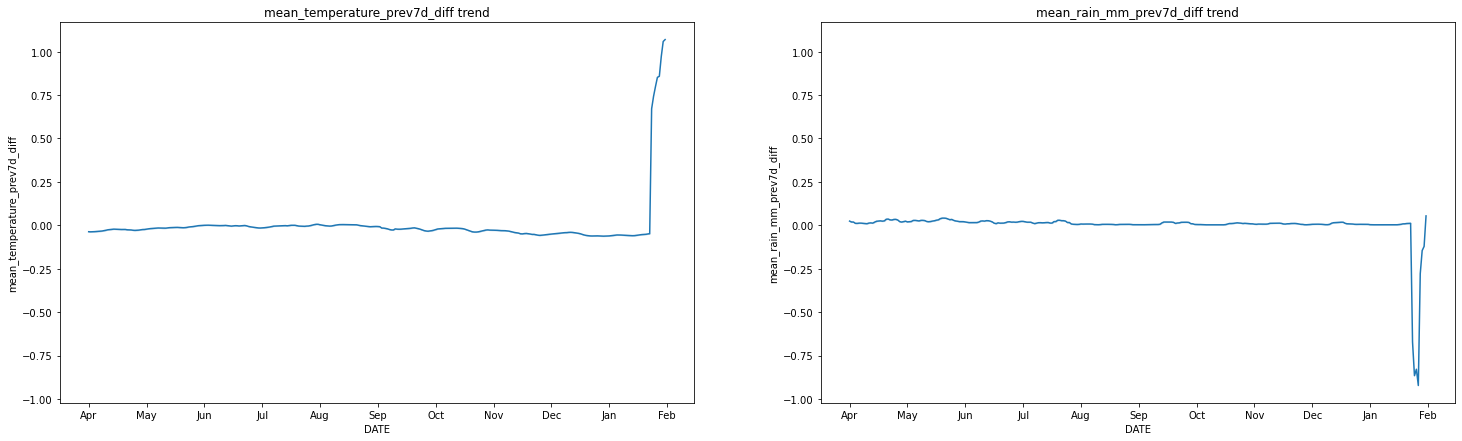

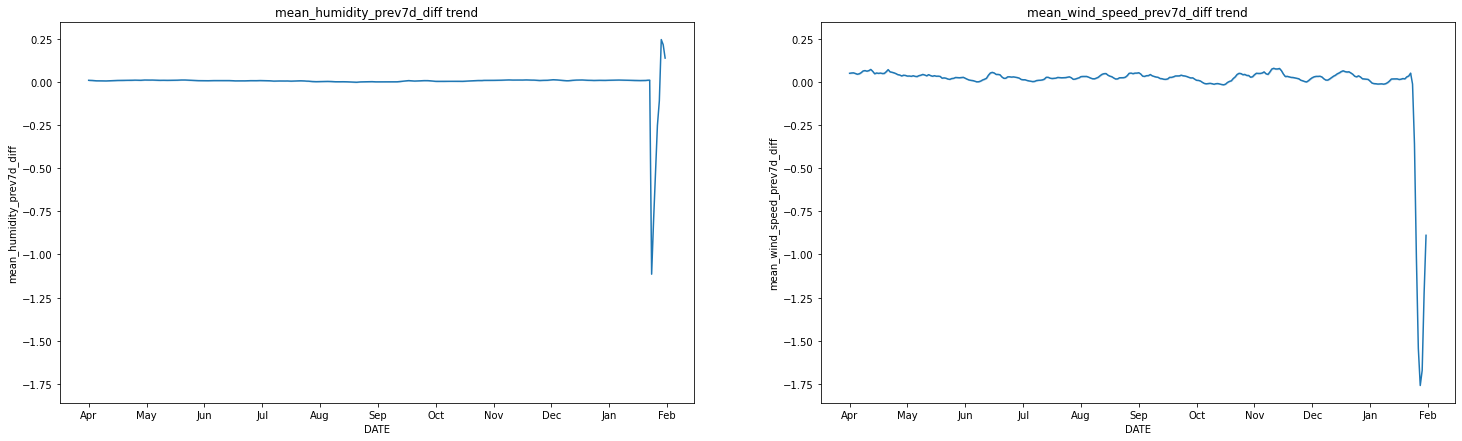

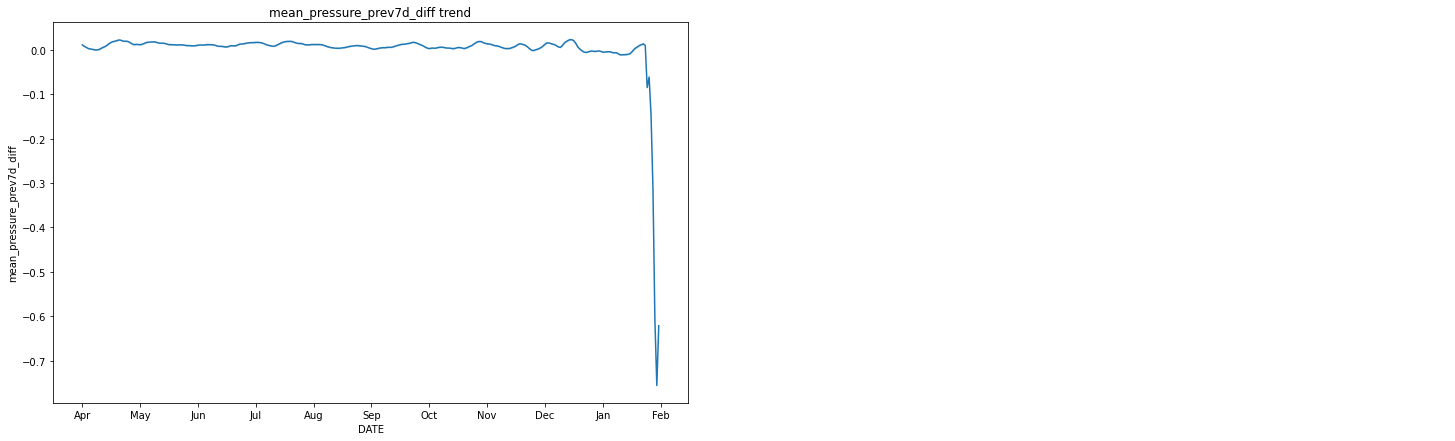

In [21]:
# checking also for min and max features

vars = ['mean_temperature_prev7d_diff','mean_rain_mm_prev7d_diff','mean_humidity_prev7d_diff', 'mean_wind_speed_prev7d_diff', 'mean_pressure_prev7d_diff']

for i in range(0,len(vars),2):
    f, axs = plt.subplots(figsize= (25,7), ncols=2,  sharey='row');

    plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']);
    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df, x='DATE', y=vars[i], ax=axs[0]).set(title=(vars[i]+' trend'))
    if(i<4):
        axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
        axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
        axs[1].yaxis.set_tick_params(labelbottom=True)
        sns.lineplot(data=df, x='DATE', y=vars[i+1],ax=axs[1]).set(title=vars[i+1]+' trend')
axs[1].axis('off')

### Comparing 3days vs 7 days weather features <a class="anchor" id="section_6_3"></a>

We expect the 7 days features to have a smoother behavior if compared to the 3days ones.

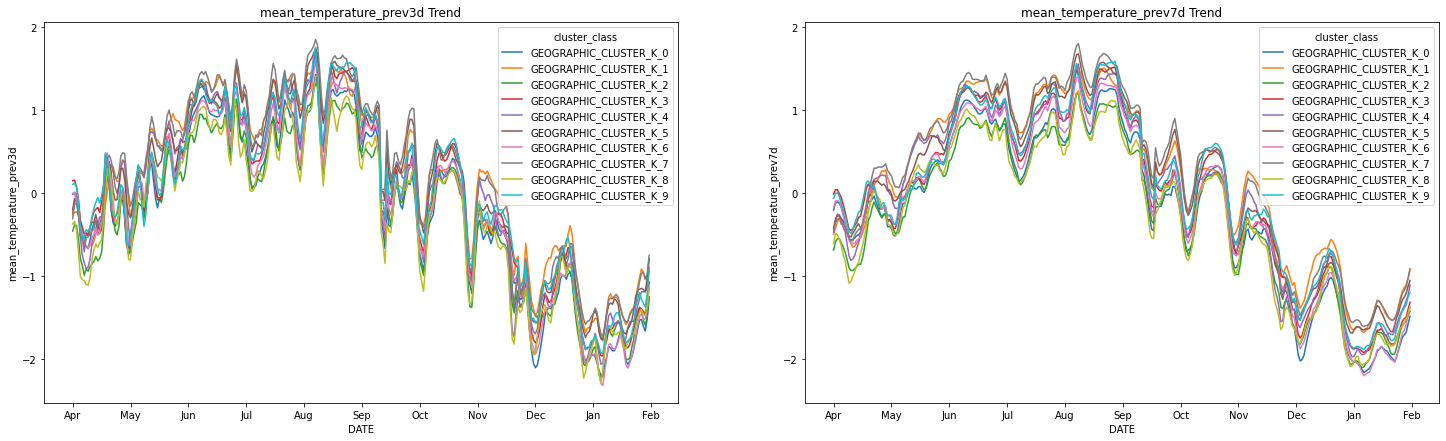

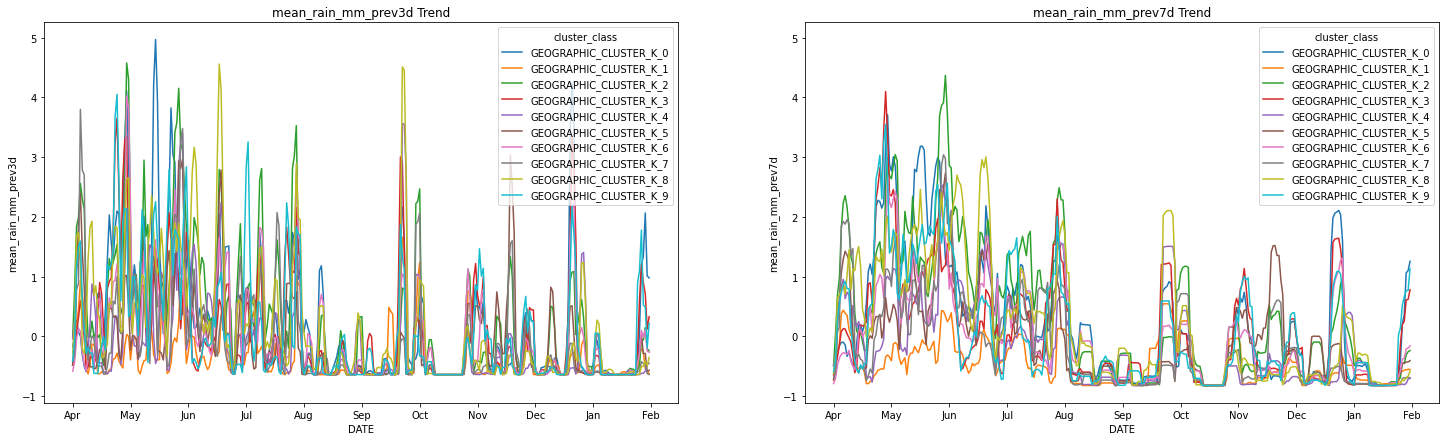

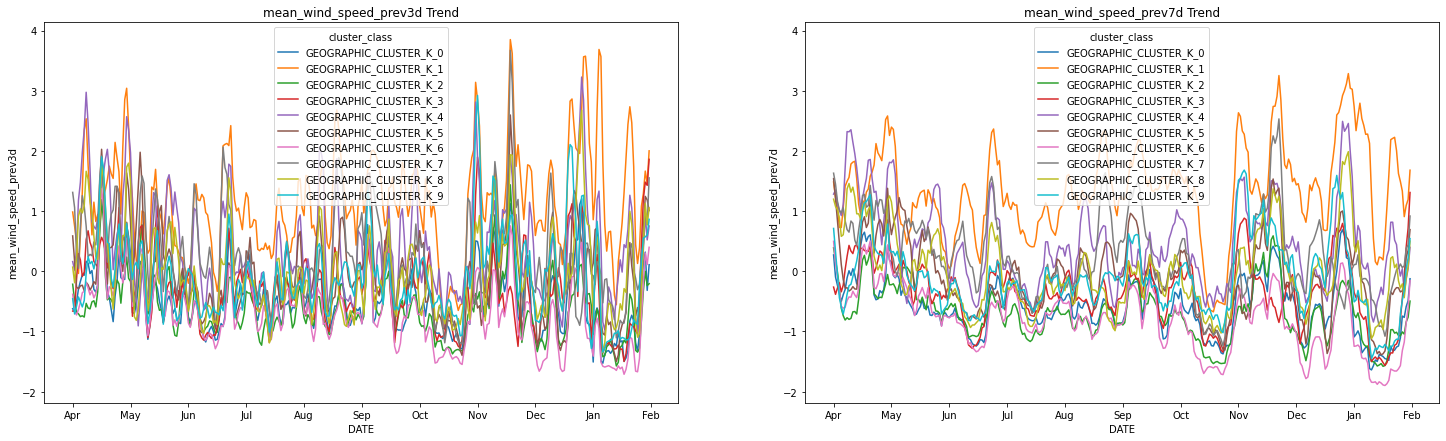

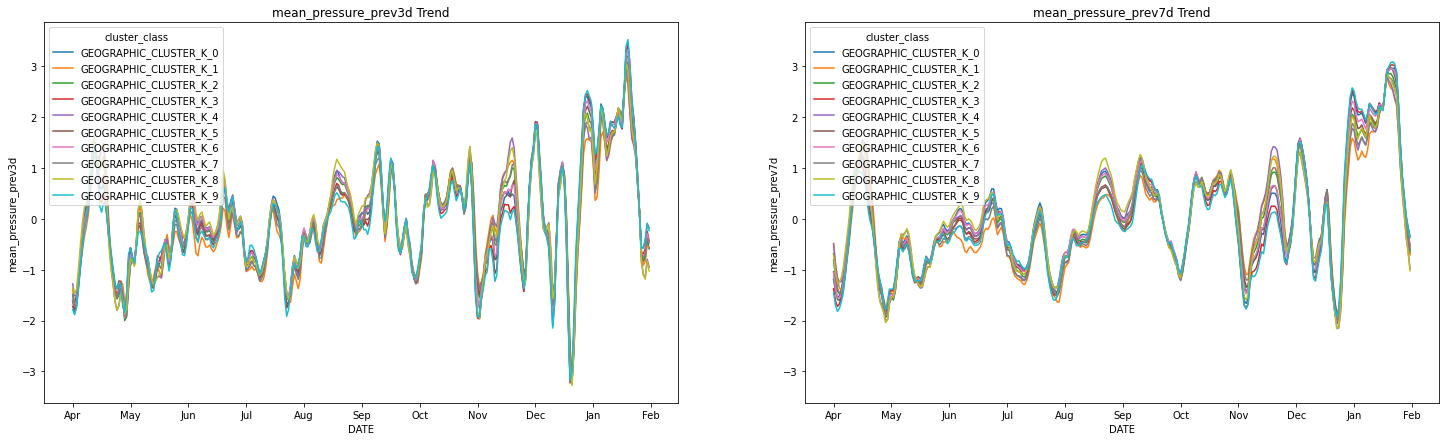

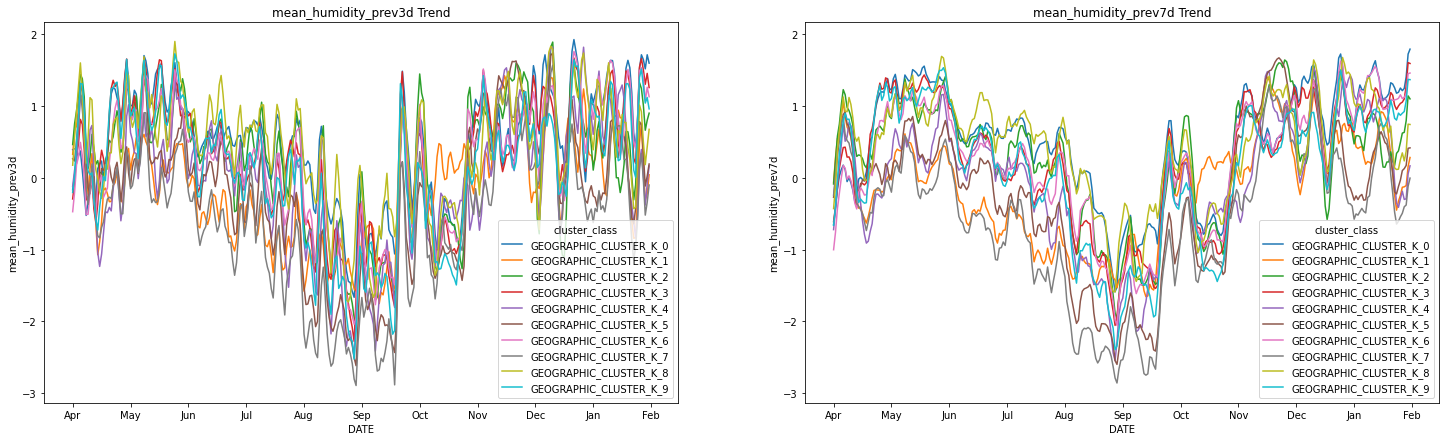

In [22]:

vars = ['mean_temperature_prev3d','mean_temperature_prev7d','mean_rain_mm_prev3d', 'mean_rain_mm_prev7d', 
        'mean_wind_speed_prev3d', 'mean_wind_speed_prev7d', 'mean_pressure_prev3d', 'mean_pressure_prev7d', 'mean_humidity_prev3d', 'mean_humidity_prev7d']

for i in range(0,len(vars),2):
    f, axs = plt.subplots(figsize= (25,7), ncols=2,  sharey='row')

    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i], ax=axs[0], hue='cluster_class').set(title=vars[i]+' Trend')
    
    axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[1].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+1],ax=axs[1], hue='cluster_class').set(title=vars[i+1]+' Trend')

### Plot alarm features trend <a class="anchor" id="section_6_4"></a>

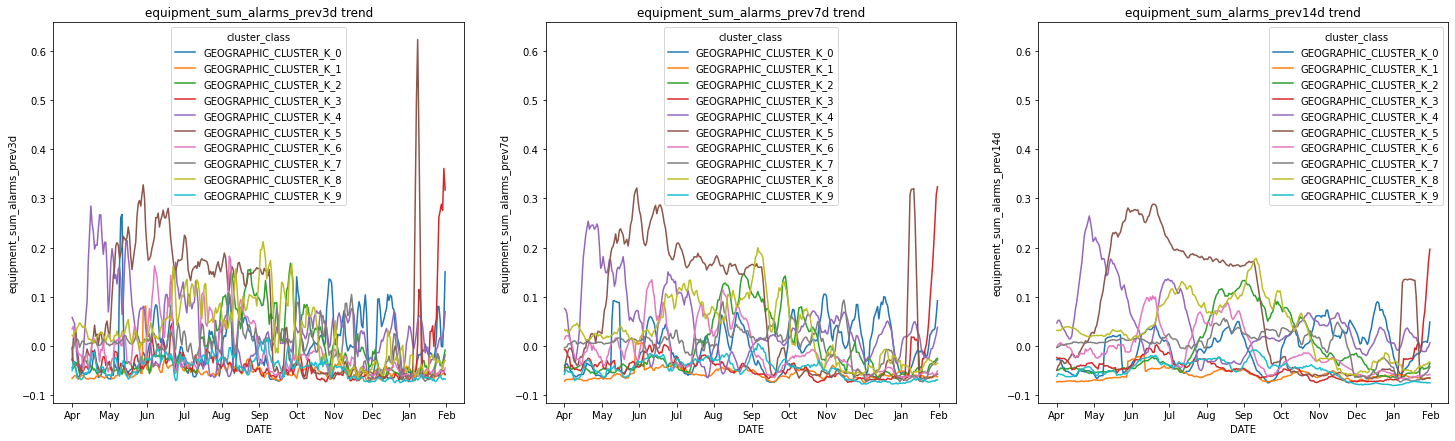

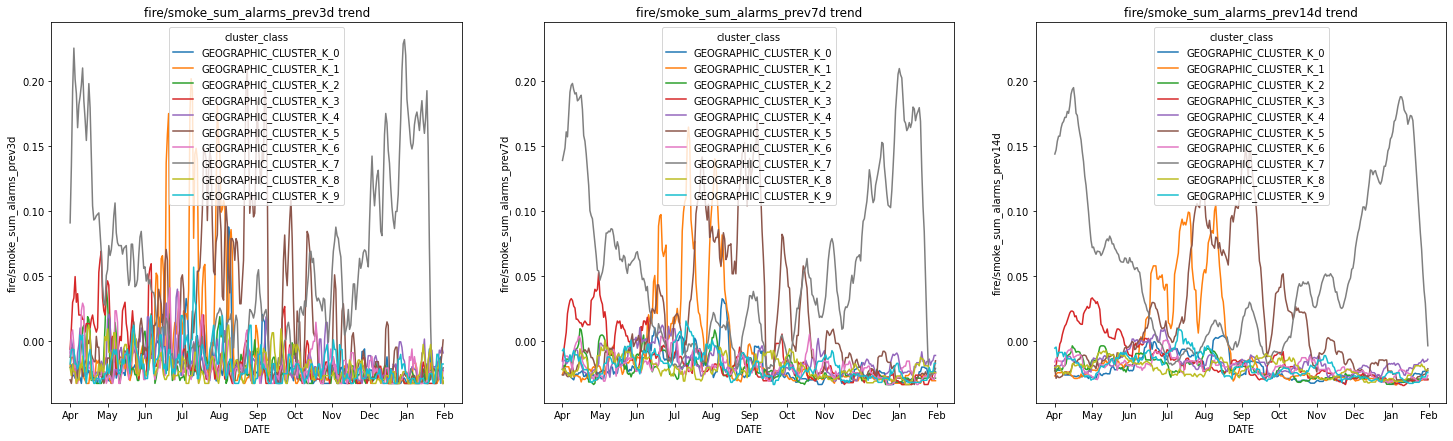

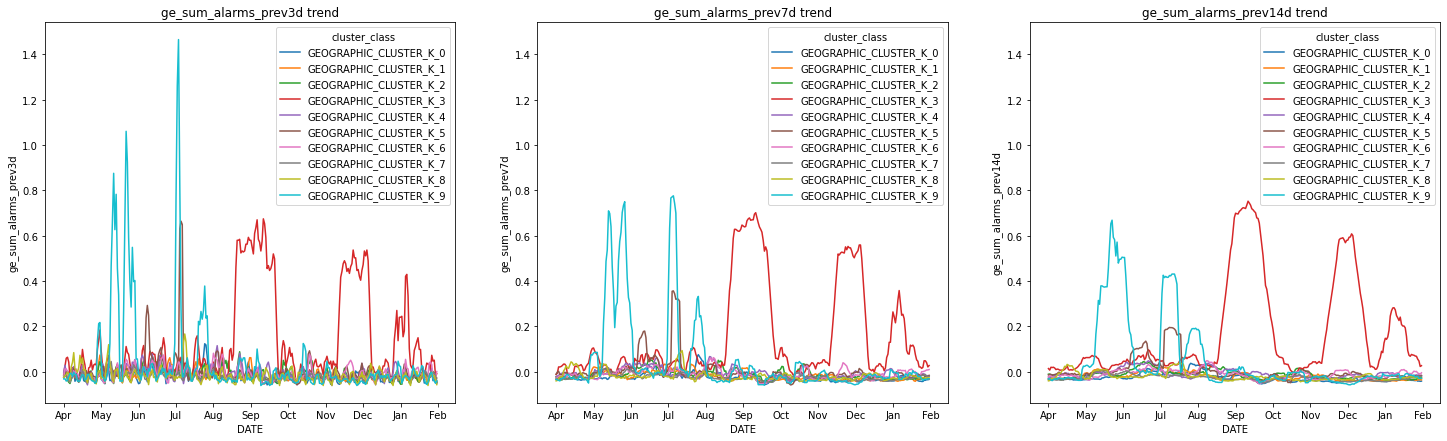

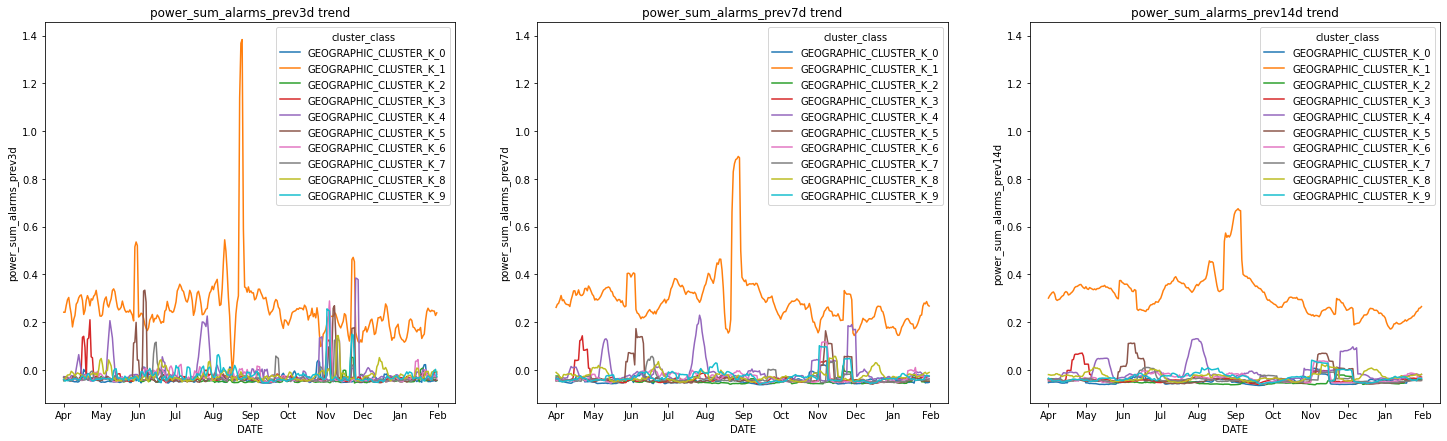

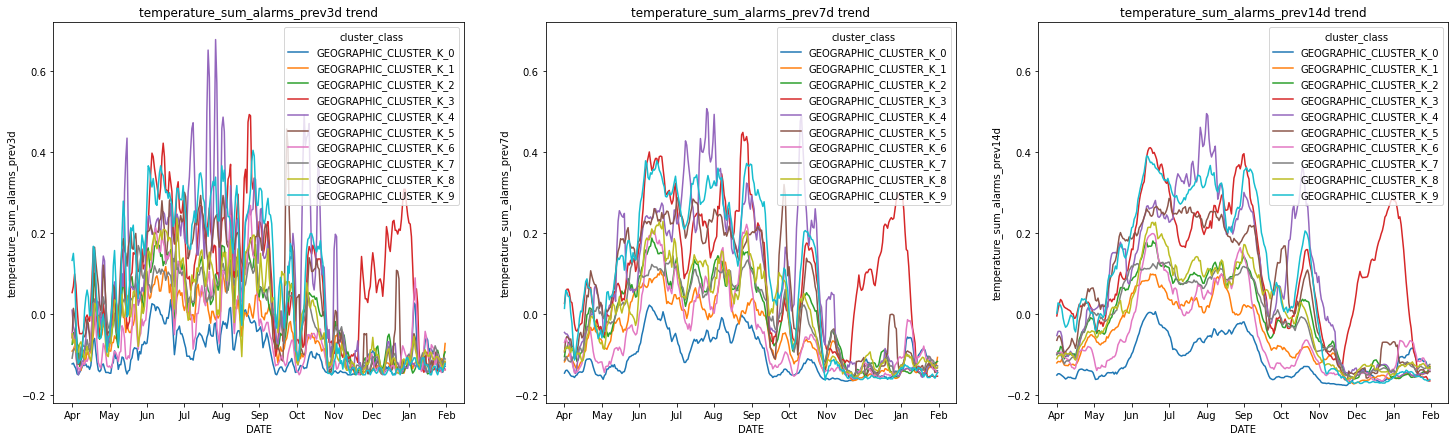

In [23]:
# checking also for min and max features

vars = ['equipment_sum_alarms_prev3d','equipment_sum_alarms_prev7d','equipment_sum_alarms_prev14d',
        'fire/smoke_sum_alarms_prev3d','fire/smoke_sum_alarms_prev7d','fire/smoke_sum_alarms_prev14d',
        'ge_sum_alarms_prev3d','ge_sum_alarms_prev7d','ge_sum_alarms_prev14d',
        'power_sum_alarms_prev3d', 'power_sum_alarms_prev7d','power_sum_alarms_prev14d',
        'temperature_sum_alarms_prev3d', 'temperature_sum_alarms_prev7d','temperature_sum_alarms_prev14d']

for i in range(0,len(vars),3):
    f, axs = plt.subplots(figsize= (25,7), ncols=3,  sharey='row')

    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i], ax=axs[0], hue='cluster_class').set(title=vars[i]+' trend')
    
    axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[1].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+1],ax=axs[1], hue='cluster_class').set(title=vars[i+1]+' trend')
    
    axs[2].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[2].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[2].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+2],ax=axs[2], hue='cluster_class').set(title=vars[i+2]+' trend')

### Skewness and kurtosis <a class="anchor" id="section_6_5"></a>

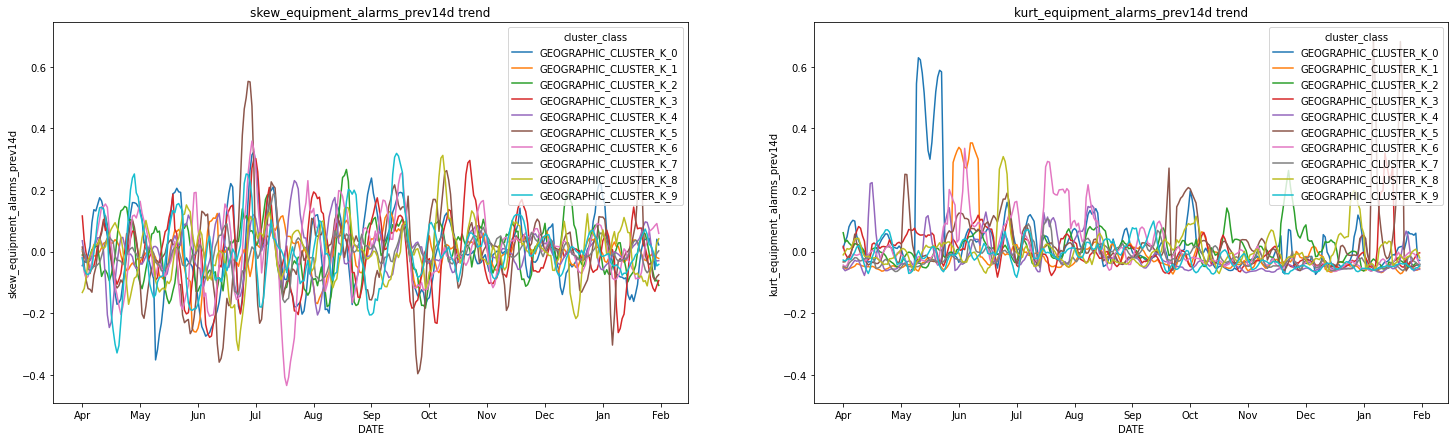

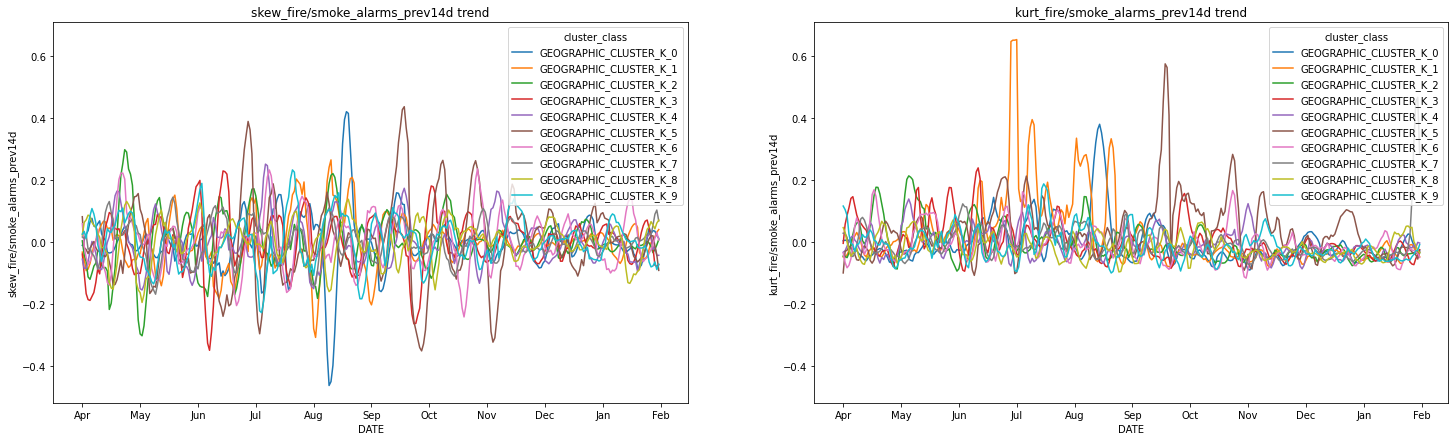

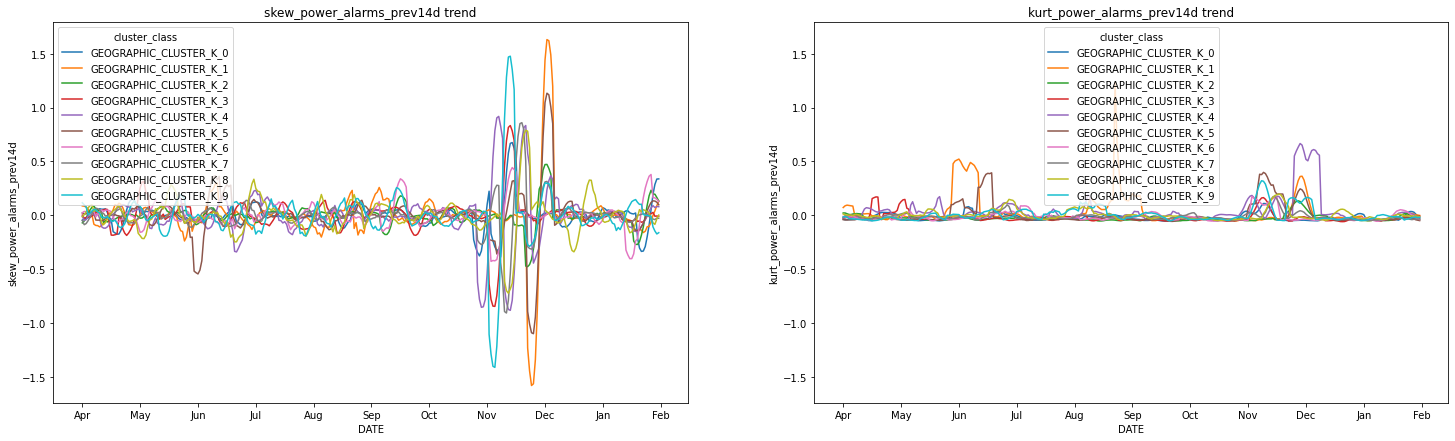

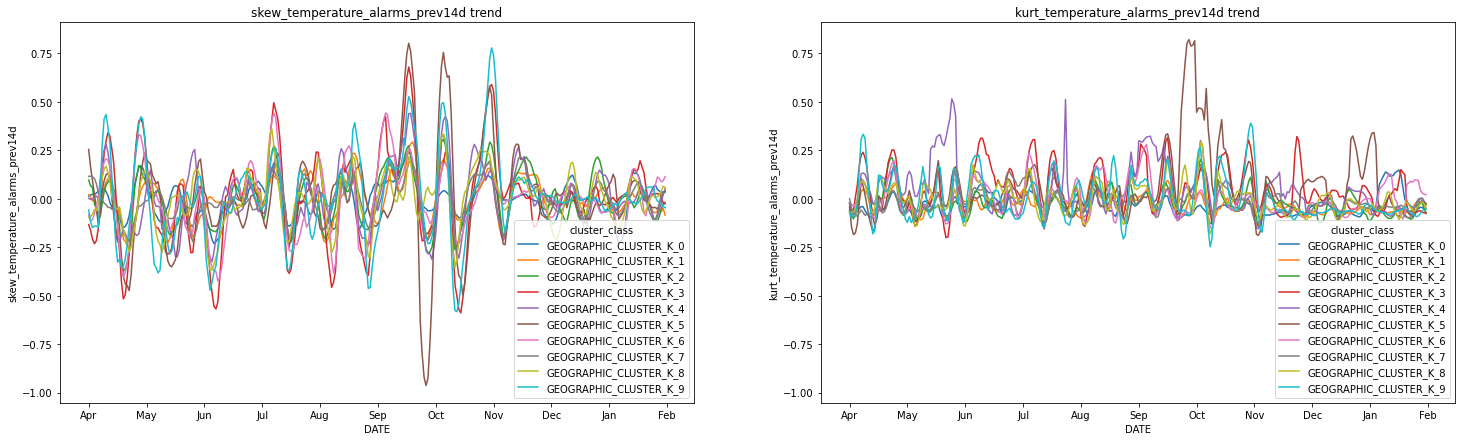

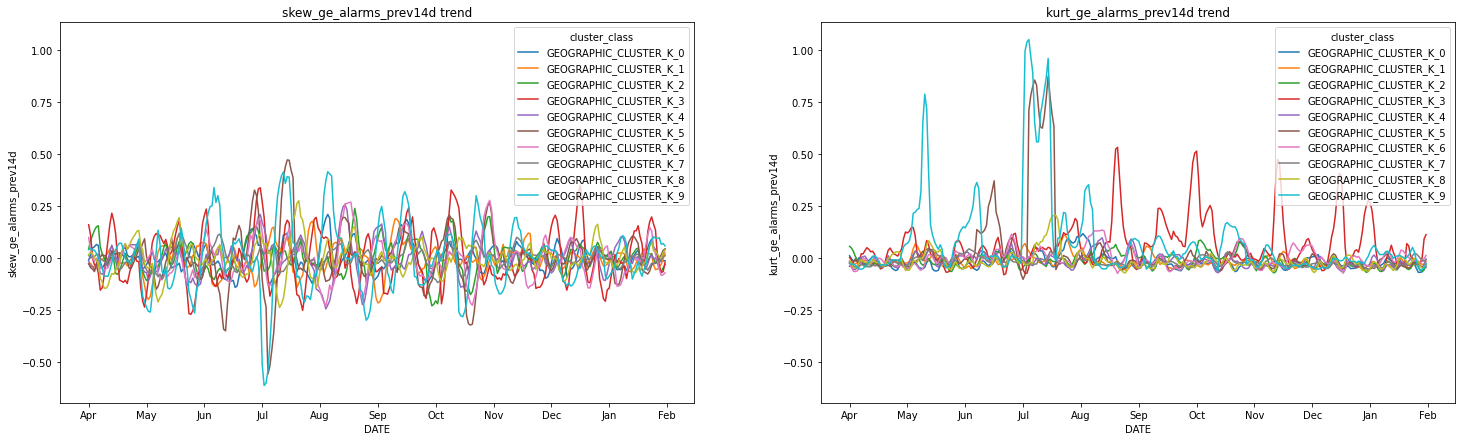

In [24]:
vars = ['skew_equipment_alarms_prev14d', 'kurt_equipment_alarms_prev14d', 'skew_fire/smoke_alarms_prev14d', 'kurt_fire/smoke_alarms_prev14d',
'skew_power_alarms_prev14d', 'kurt_power_alarms_prev14d', 'skew_temperature_alarms_prev14d', 'kurt_temperature_alarms_prev14d', 'skew_ge_alarms_prev14d','kurt_ge_alarms_prev14d']

for i in range(0,len(vars),2):
    f, axs = plt.subplots(figsize= (25,7), ncols=2,  sharey='row')

    axs[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[0].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i], ax=axs[0], hue='cluster_class').set(title=vars[i]+' trend')
    
    axs[1].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], minor=False)
    axs[1].set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'], fontdict=None, minor=False)
    axs[1].yaxis.set_tick_params(labelbottom=True)
    sns.lineplot(data=df_cluster_date_group, x='DATE', y=vars[i+1],ax=axs[1], hue='cluster_class').set(title=vars[i+1]+' trend')


In [37]:
dataset = pd.read_csv(dataset_path)

container = data_container(dataset, drop=False)
numerical_feature = container.numerical_features

In [38]:
len(dataset['SITE_ID'].unique())
dataset['aircon_sum_wo_prev14d'].unique()

array([0., 1., 2., 3., 4., 5., 7., 6., 8.])

In [29]:
numerical_feature

remove = ['temperature_max_persistance_prev14d', 'temperature_min_persistance_prev14d', 'temperature_mean_persistance_prev14d','mean_temperature_prev14d', 'min_pressure_prev14d', 'power_mean_persistance_prev14d', 'max_humidity_prev14d', 'min_temperature_prev14d', 'max_wind_speed_prev14d', 'equipment_max_persistance_prev14d', 'max_temperature_prev14d', 'min_rain_mm_prev14d', 'ge_max_persistance_prev14d', 'min_humidity_prev14d', 'equipment_mean_persistance_prev14d', 'fire/smoke_min_persistance_prev14d', 'min_wind_speed_prev14d', 'mean_pressure_prev14d', 'max_rain_mm_prev14d', 'temperature_max_persistance_prev14d', 'temperature_mean_persistance_prev14d', 'equipment_min_persistance_prev14d', 'power_min_persistance_prev14d', 'fire/smoke_mean_persistance_prev14d', 'power_max_persistance_prev14d', 'max_pressure_prev14d', 'mean_wind_speed_prev14d', 'mean_rain_mm_prev14d', 'mean_humidity_prev14d', 'ge_mean_persistance_prev14d', 'temperature_min_persistance_prev14d', 'ge_min_persistance_prev14d', 'fire/smoke_max_persistance_prev14d']
for string in remove:
    if string in numerical_feature: numerical_feature.remove(string)


In [39]:
group_id_faults = dataset.groupby(['SITE_ID']).sum().reset_index()

In [40]:
with pd.option_context( 'display.max_columns', None):
    display (group_id_faults)

SITE_ID  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
0           0              300                0              0   
1           1              300                0              0   
2           2              300                0              0   
3           3              300                0              0   
4           5              300                0              0   
...       ...              ...              ...            ...   
2066     2600              300                0              0   
2067     2601              300                0              0   
2068     2602              300                0              0   
2069     2603              300                0              0   
2070     2604              300                0              0   

      CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
0                     0                0               1200.0   
1                     0                0                600.0   
2                     0                0               2400.0   
3                     0                0                300.0   
4                     0                0                600.0   
...                 ...              ...                  ...   
2066                  0                0               1800.0   
2067                  0                0                300.0   
2068                  0                0               2100.0   
2069                  0                0               2100.0   
2070                  0                0                300.0   

      GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  GEOGRAPHIC_CLUSTER_K_2  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
2066                       0                       0                       0   
2067                     300                       0                       0   
2068                     300                       0                       0   
2069                       0                       0                       0   
2070                       0                       0                     300   

      GEOGRAPHIC_CLUSTER_K_3  GEOGRAPHIC_CLUSTER_K_4  GEOGRAPHIC_CLUSTER_K_5  \
0                          0                       0                       0   
1                          0                     300                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                     300                       0   
...                      ...                     ...                     ...   
2066                       0                       0                       0   
2067                       0                       0                       0   
2068                       0                       0                       0   
2069                       0                       0                       0   
2070                       0                       0                       0   

      GEOGRAPHIC_CLUSTER_K_6  GEOGRAPHIC_CLUSTER_K_7  GEOGRAPHIC_CLUSTER_K_8  \
0                        300                       0                       0   
1                          0                       0                       0   
2                          0                     300                       0   
3                        300                       0                       0   
4                          0                       0                       0   
...                      ...  

In [44]:
group_id_faults=group_id_faults.sort_values(by=['aircon_sum_wo_prev14d'], ascending=False)
with pd.option_context( 'display.max_columns', None):
    display (group_id_faults)

SITE_ID  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
982      1263              300                0              0   
1241     1578              300                0              0   
373       483              300                0              0   
397       519              300                0              0   
1804     2275              300                0              0   
...       ...              ...              ...            ...   
1956     2464              300                0              0   
1957     2465              300                0              0   
1958     2466              300                0              0   
1960     2470              300                0              0   
277       361              300                0              0   

      CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
982                   0                0               6000.0   
1241                  0                0                300.0   
373                   0                0                900.0   
397                   0                0                900.0   
1804                  0                0                300.0   
...                 ...              ...                  ...   
1956                  0                0               2100.0   
1957                  0                0                900.0   
1958                  0                0               3000.0   
1960                  0                0                300.0   
277                   0                0                900.0   

      GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  GEOGRAPHIC_CLUSTER_K_2  \
982                        0                       0                       0   
1241                       0                       0                       0   
373                        0                       0                       0   
397                        0                       0                       0   
1804                       0                       0                       0   
...                      ...                     ...                     ...   
1956                       0                       0                       0   
1957                       0                       0                       0   
1958                       0                       0                       0   
1960                       0                       0                       0   
277                        0                     300                       0   

      GEOGRAPHIC_CLUSTER_K_3  GEOGRAPHIC_CLUSTER_K_4  GEOGRAPHIC_CLUSTER_K_5  \
982                        0                       0                       0   
1241                     300                       0                       0   
373                        0                       0                       0   
397                      300                       0                       0   
1804                       0                       0                       0   
...                      ...                     ...                     ...   
1956                       0                       0                     300   
1957                       0                     300                       0   
1958                     300                       0                       0   
1960                       0                       0                     300   
277                        0                       0                       0   

      GEOGRAPHIC_CLUSTER_K_6  GEOGRAPHIC_CLUSTER_K_7  GEOGRAPHIC_CLUSTER_K_8  \
982                        0                       0                       0   
1241                       0                       0                       0   
373                        0                       0                       0   
397                        0                       0                       0   
1804                       0                       0                       0   
...                      ...  

In [47]:
top_IDs=group_id_faults['SITE_ID'].head(20)
top_IDs

982     1263
1241    1578
373      483
397      519
1804    2275
1088    1395
1172    1494
1552    1964
1811    2282
1144    1459
1121    1434
601      767
1131    1446
485      625
542      692
362      470
1108    1420
1667    2108
1437    1822
476      616
Name: SITE_ID, dtype: int64

In [51]:
dataset_top_faults = dataset[dataset['SITE_ID'].isin(top_IDs)]
with pd.option_context( 'display.max_columns', None):
    display(dataset_top_faults)

SITE_ID        DATE  CELL_TYPE_Macro  CELL_TYPE_Mobil  CELL_TYPE_TRP  \
106800     1395  2019-04-10                1                0              0   
106801     1395  2019-04-11                1                0              0   
106802     1395  2019-04-12                1                0              0   
106803     1395  2019-04-13                1                0              0   
106804     1395  2019-04-14                1                0              0   
...         ...         ...              ...              ...            ...   
608695     1578  2020-01-30                1                0              0   
608696     1578  2020-01-31                1                0              0   
608697     1578  2020-02-01                1                0              0   
608698     1578  2020-02-02                1                0              0   
608699     1578  2020-02-03                1                0              0   

        CELL_TYPE_Tx site  CELL_TYPE_micro  N_TRANSPORTED_SITES  \
106800                  0                0                  2.0   
106801                  0                0                  2.0   
106802                  0                0                  2.0   
106803                  0                0                  2.0   
106804                  0                0                  2.0   
...                   ...              ...                  ...   
608695                  0                0                  1.0   
608696                  0                0                  1.0   
608697                  0                0                  1.0   
608698                  0                0                  1.0   
608699                  0                0                  1.0   

        GEOGRAPHIC_CLUSTER_K_0  GEOGRAPHIC_CLUSTER_K_1  \
106800                       0                       1   
106801                       0                       1   
106802                       0                       1   
106803                       0                       1   
106804                       0                       1   
...                        ...                     ...   
608695                       0                       0   
608696                       0                       0   
608697                       0                       0   
608698                       0                       0   
608699                       0                       0   

        GEOGRAPHIC_CLUSTER_K_2  GEOGRAPHIC_CLUSTER_K_3  \
106800                       0                       0   
106801                       0                       0   
106802                       0                       0   
106803                       0                       0   
106804                       0                       0   
...                        ...                     ...   
608695                       0                       1   
608696                       0                       1   
608697                       0                       1   
608698                       0                       1   
608699                       0                       1   

        GEOGRAPHIC_CLUSTER_K_4  GEOGRAPHIC_CLUSTER_K_5  \
106800                       0                       0   
106801                       0                       0   
106802                       0                       0   
106803                       0                       0   
106804                       0                       0   
...                        ...                     ...   
608695                       0                       0   
608696                       0                       0   
608697                       0                       0   
608698                       0                       0   
608699                       0                       0   

        GEOGRAPHIC_CLUSTER_K_6  GEOGRAPHIC_CLUSTER_K_7  \
106800                       0                       0   
106801                       0     

<AxesSubplot:xlabel='DATE', ylabel='power_sum_alarms_prev14d'>

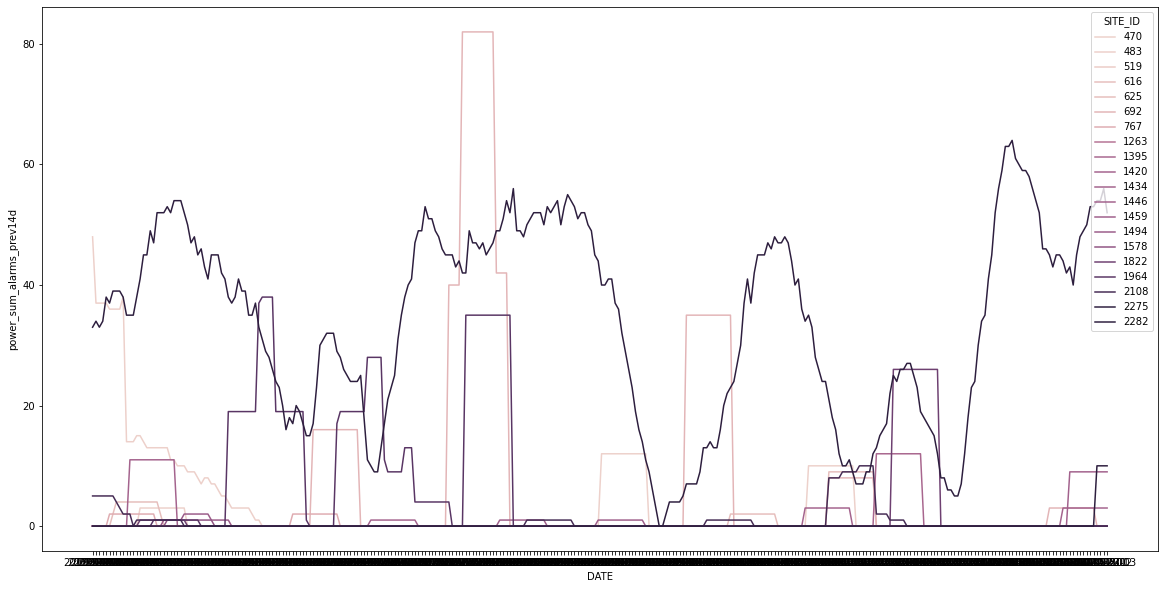

In [61]:
plt.figure(figsize= (20,10))
sns.lineplot(data=dataset_top_faults, x='DATE', y='power_sum_alarms_prev14d', hue='SITE_ID', legend='full')
